In [26]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = np.loadtxt('../data/logistic_data1.txt', delimiter=',')

X = data[:,:data.shape[1] - 1]; print(X.shape)  #X = data[:, 0:2]
Y = data[:,data.shape[1] - 1:]; print(Y.shape)  #y = data[:, 2]

(100, 2)
(100, 1)


In [28]:
print(X[:5,:])
print(Y[:5,:])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


데이터를 살펴보니 X 는 (x1, x2) 형태의 피쳐가 두 개입니다.

참고로 x1 은 중간고사의 점수 x2 는 기말고사의 점수로 레이블 1은 합격, 레이블 0은 불합격을 의미합니다.

x1 과 x2 의 스케일이 어느정도 비슷하고 숫자의 크기도 크지 않으니 우선 데이터를 정규화하지 않고 그냥 회귀를 해보겠습니다.

데이터를 눈으로 확인했으니 시각화도 해보겠습니다.

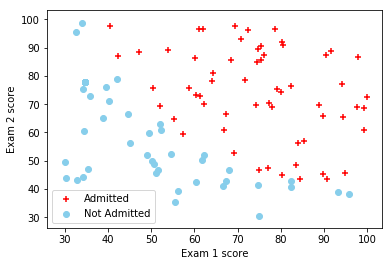

In [29]:
pos = np.where(Y == 1)
neg = np.where(Y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='r')
plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='skyblue')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

In [50]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(X)
train_Y = to_categorical(Y)

In [45]:
def train_binary_logistic(train_X, train_Y):
    model = Sequential()
    model.add(Dense(10, input_shape=(train_X.shape[1],)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_X, train_Y, epochs=10, batch_size=10)
    return model

In [46]:
model = train_binary_logistic(train_X, train_Y)

Epoch 1/10
100/100 [==============================] - 1s 6ms/step - loss: 0.8846 - acc: 0.3300
Epoch 2/10
100/100 [==============================] - 0s 371us/step - loss: 0.8132 - acc: 0.5000
Epoch 3/10
100/100 [==============================] - 0s 218us/step - loss: 0.7586 - acc: 0.6500
Epoch 4/10
100/100 [==============================] - 0s 349us/step - loss: 0.7076 - acc: 0.6900
Epoch 5/10
100/100 [==============================] - 0s 369us/step - loss: 0.6655 - acc: 0.7200
Epoch 6/10
100/100 [==============================] - 0s 390us/step - loss: 0.6274 - acc: 0.8000
Epoch 7/10
100/100 [==============================] - 0s 349us/step - loss: 0.5904 - acc: 0.8100
Epoch 8/10
100/100 [==============================] - 0s 368us/step - loss: 0.5598 - acc: 0.8400
Epoch 9/10
100/100 [==============================] - 0s 331us/step - loss: 0.5294 - acc: 0.8700
Epoch 10/10
100/100 [==============================] - 0s 447us/step - loss: 0.5010 - acc: 0.8800


In [47]:
prediction_prob = model.predict(train_X)

In [48]:
prediction = np.argmax(prediction_prob, axis=1)

In [49]:
prediction[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [74]:
from matplotlib.colors import LinearSegmentedColormap
def plot_binaryMesh(clf, X, Y):
    scaler = StandardScaler().fit(X)
    pts = 200
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, pts), np.linspace(y_min, y_max, pts))
    scaled_X = scaler.transform(np.c_[xx.ravel(), yy.ravel()])[:,:] 
    Z = clf.predict(scaled_X)
    Z = np.argmax(Z, axis=1)
    cm_field = LinearSegmentedColormap.from_list('field',['lightskyblue', 'lightsalmon'], N=2)
    cm_data = LinearSegmentedColormap.from_list('data', ['blue', 'red'], N=2)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    plt.figure(1, figsize=(6, 6))
    ax = plt.gca()
    ax.pcolormesh(xx, yy, Z, cmap=cm_field)
    #print(Z)
    ax.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors='k', cmap=cm_data)
    

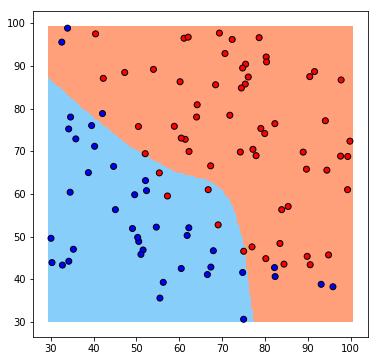

In [75]:
plot_binaryMesh(model, X, Y)